In [5]:
from kan import *
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,1,1], grid=5, k=3, seed=2, device=device)
f = lambda x: torch.sin(2*(torch.log(x[:,[0]])+torch.log(x[:,[1]])))
dataset = create_dataset(f, n_var=2, ranges=[0.2,5], device=device)

# train the model
model.fit(dataset, opt="LBFGS", steps=20);

cpu
checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                           | 0/20 [00:00<?, ?it/s]

| train_loss: 1.12e-01 | test_loss: 1.36e-01 | reg: 6.30e+00 | : 100%|█| 20/20 [00:08<00:00,  2.33it

saving model version 0.1


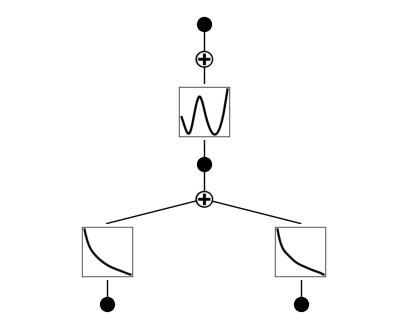

In [6]:
model.plot()

In [7]:
model.fix_symbolic(0,0,0,'log')
model.fix_symbolic(0,1,0,'log')
model.fix_symbolic(1,0,0,'sin')

Best value at boundary.
r2 is 0.9998002648353577
saving model version 0.2
r2 is 0.9994087219238281
saving model version 0.3
r2 is 0.9647927284240723
saving model version 0.4


tensor(0.9648)

In [8]:
ex_round(model.symbolic_formula()[0][0], 3)

0.955*sin(1.94*log(9.998*x_1 + 0.112) + 1.891*log(9.03*x_2 - 0.2) - 14.765) - 0.028

In [9]:
from kan import *
import torch

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,1,1], grid=5, k=3, seed=0)
f = lambda x: torch.sqrt(x[:,[0]]**2+x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)

# train the model
model.fit(dataset, opt="LBFGS", steps=20);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.20e-01 | test_loss: 1.32e-01 | reg: 5.78e+00 | : 100%|█| 20/20 [00:07<00:00,  2.73it

saving model version 0.1


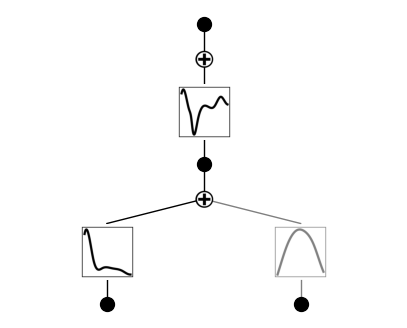

In [10]:
model.plot()

In [11]:
model.fix_symbolic(0,0,0,'x^2')
model.fix_symbolic(0,1,0,'x^2')
model.fix_symbolic(1,0,0,'sqrt')

r2 is 0.8091209530830383
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.2
r2 is 0.9982719421386719
saving model version 0.3
r2 is 0.0811009556055069
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.4


tensor(0.0811)

In [12]:
model = model.rewind('0.4')
model.get_act(dataset)

rewind to model version 0.4, renamed as 1.4


In [13]:
formula = model.symbolic_formula()[0][0]
formula

1.04119825363159 - 0.330467074353878*sqrt(0.175258121609434*(0.00506821822823697 - x_2)**2 - 0.459176319620412*(0.408404626153211 - x_1)**2 + 1)

In [14]:
ex_round(formula, 2)

1.04 - 0.33*sqrt(0.18*(0.01 - x_2)**2 - 0.46*(0.41 - x_1)**2 + 1)

In [15]:
model.fit(dataset, opt="Adam", steps=1000, lr=1e-3, update_grid=False, singularity_avoiding=True);

| train_loss: 1.62e-01 | test_loss: nan | reg: 0.00e+00 | : 100%|█| 1000/1000 [00:28<00:00, 35.03it/

saving model version 1.5


In [16]:
model.fit(dataset, opt="Adam", steps=1000, lr=1e-3, update_grid=False);

| train_loss: nan | test_loss: nan | reg: nan | : 100%|█████████| 1000/1000 [00:29<00:00, 33.41it/s]

saving model version 1.6
